In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

/tmp/ipykernel_46592/3623354761.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("dataset/phase2_df.csv")
df.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other
0,0.166218,0,0,0,1,0,0,1,0,0,1
1,0.000000,1,0,0,0,0,0,1,1,0,0
2,0.491054,0,1,0,0,1,0,0,0,0,1
3,0.788863,0,0,1,0,0,0,1,0,1,0
4,0.351813,0,0,0,1,0,0,1,0,0,1


In [3]:
df.shape

(37797, 11)

In [4]:
## Data Splitting
# Here, we use a typical split ratio of 70% training and 30% testing
X, Y = train_test_split(df, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X.shape)
print("Testing set shape:", Y.shape)

Training set shape: (26457, 11)
Testing set shape: (11340, 11)


In [5]:
X.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other
2579,0.762515,0,1,0,0,0,1,0,0,0,1
14749,0.831993,0,1,0,0,1,0,0,1,0,0
36144,0.821460,0,1,0,0,0,1,0,0,1,0
25546,0.864317,0,0,1,0,0,1,0,0,1,0
19501,0.772368,0,1,0,0,0,1,0,0,1,0


In [6]:
Y.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other
6206,0.706137,0,0,1,0,0,0,1,0,0,1
8341,0.620978,0,0,1,0,0,0,1,1,0,0
20592,0.799546,0,0,1,0,1,0,0,0,0,1
20731,0.790263,0,1,0,0,0,0,1,0,1,0
36881,0.822473,0,1,0,0,0,1,0,0,1,0


In [7]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

def hopkins_statistic(X, n_neighbors=10):
    """
    Calculate the Hopkins statistic for a given dataset.

    Parameters:
    - X: The input dataset (numpy array or pandas DataFrame).
    - n_neighbors: Number of nearest neighbors for the calculation.

    Returns:
    - Hopkins statistic value.
    """

    # If input is DataFrame, convert it to numpy array
    if isinstance(X, pd.DataFrame):
        X = X.values

    n = X.shape[0]  # Number of samples

    # Create a random dataset with the same dimensionality as X
    random_data = np.random.rand(n, X.shape[1])

    # Normalize both datasets
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    random_data_scaled = scaler.transform(random_data)

    # Fit nearest neighbors on the original and random datasets
    nn_original = NearestNeighbors(n_neighbors=n_neighbors).fit(X_scaled)
    nn_random = NearestNeighbors(n_neighbors=n_neighbors).fit(random_data_scaled)

    # Calculate distances and return the Hopkins statistic
    d_X, _ = nn_original.kneighbors(X_scaled)
    d_R, _ = nn_random.kneighbors(random_data_scaled)

    u_X = np.sum(d_X, axis=1)
    u_R = np.sum(d_R, axis=1)

    return np.sum(u_X) / (np.sum(u_X) + np.sum(u_R))


# Example usage:
# Assuming 'df' is your DataFrame with the features for clustering
hopkins_value = hopkins_statistic(X, n_neighbors=10)
print(f"Hopkins Statistic: {hopkins_value}")


Hopkins Statistic: 0.006915093365597201


* From the results above it is clear that their exist some valuable clusters from the data present.

In [8]:
## Perform Elbow method to get he right value for K
from sklearn.cluster import KMeans

intertia_array = []
for k in range(1,41):
    kmeans_iter = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="lloyd", random_state=42)
    kmeans_iter.fit(X)

    intertia_array.append(kmeans_iter.inertia_)

intertia_array

[51509.599130716706,
 43443.02181493245,
 34023.938375843936,
 31205.953129711736,
 30664.12056005303,
 27986.71254075851,
 24480.852565305817,
 23011.005960029954,
 21075.34765630009,
 18110.627787666723,
 16721.378725445757,
 14546.613073030847,
 14212.251814146954,
 12301.11768705987,
 11383.713674102517,
 9744.953289111854,
 9925.098912478326,
 8300.405165396336,
 8210.512144557279,
 6745.382321925911,
 7053.1846308357735,
 6256.239487025846,
 5308.907763243841,
 4490.758423518102,
 5798.631984733859,
 4020.5595633985995,
 4550.804357209063,
 5305.18291475116,
 5186.070512497293,
 4491.999150338872,
 3888.1053150362404,
 3281.4046807549294,
 4271.42934199622,
 2605.577637581395,
 3178.9105769096286,
 2105.5825093192607,
 2117.5073225302986,
 1830.3810917155124,
 2544.4323754242946,
 2003.7470826032804]

Text(0, 0.5, 'Inertia')

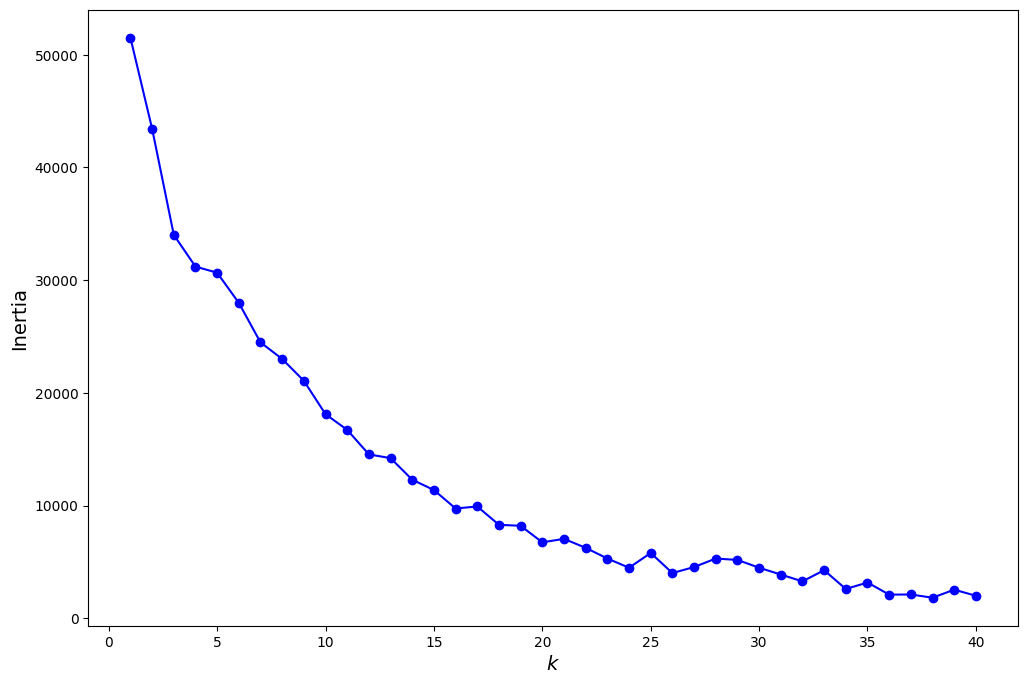

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 41), intertia_array, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

* Value of K=8 or 20 seems to be best fit for our case.

In [10]:
## K-Means Clustering

k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)

In [11]:
X['label'] = kmeans.labels_
X.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,label
2579,0.762515,0,1,0,0,0,1,0,0,0,1,9
14749,0.831993,0,1,0,0,1,0,0,1,0,0,0
36144,0.821460,0,1,0,0,0,1,0,0,1,0,3
25546,0.864317,0,0,1,0,0,1,0,0,1,0,14
19501,0.772368,0,1,0,0,0,1,0,0,1,0,3


In [12]:
Y['label'] = kmeans.predict(Y)
Y.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,label
6206,0.706137,0,0,1,0,0,0,1,0,0,1,1
8341,0.620978,0,0,1,0,0,0,1,1,0,0,6
20592,0.799546,0,0,1,0,1,0,0,0,0,1,1
20731,0.790263,0,1,0,0,0,0,1,0,1,0,15
36881,0.822473,0,1,0,0,0,1,0,0,1,0,3


In [13]:
X["label"].value_counts()

label
9     2595
5     2221
2     1938
1     1901
0     1816
3     1767
4     1475
8     1435
10    1217
19    1065
13    1048
7     1044
16    1037
11    1031
12     896
18     827
14     812
15     802
17     784
6      746
Name: count, dtype: int64

In [14]:
X[X["label"]==9].head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,label
2579,0.762515,0,1,0,0,0,1,0,0,0,1,9
20848,0.774683,0,1,0,0,0,1,0,0,0,1,9
17390,0.747821,0,1,0,0,0,1,0,0,0,1,9
28486,0.777796,0,1,0,0,0,1,0,0,0,1,9
24131,0.810580,0,1,0,0,0,1,0,0,0,1,9


In [15]:
X[X["label"]==8].head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,label
1584,0.500710,1,0,0,0,1,0,0,0,1,0,8
6453,0.730386,1,0,0,0,0,1,0,0,1,0,8
14613,0.820312,1,0,0,0,0,1,0,0,1,0,8
12249,0.834527,1,0,0,0,0,1,0,0,1,0,8
15943,0.797938,1,0,0,0,0,1,0,0,1,0,8


In [16]:
## Data Splitting
# Here, we use a typical split ratio of 70% training and 20% testing
X, Y = train_test_split(df, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X.shape)
print("Testing set shape:", Y.shape)

Training set shape: (26457, 11)
Testing set shape: (11340, 11)


In [17]:
## Hierarchical Clustering
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
Z = sch.linkage(X, method='ward') #linkage = ward
Z.shape

(26456, 4)

Text(0, 0.5, 'distance')

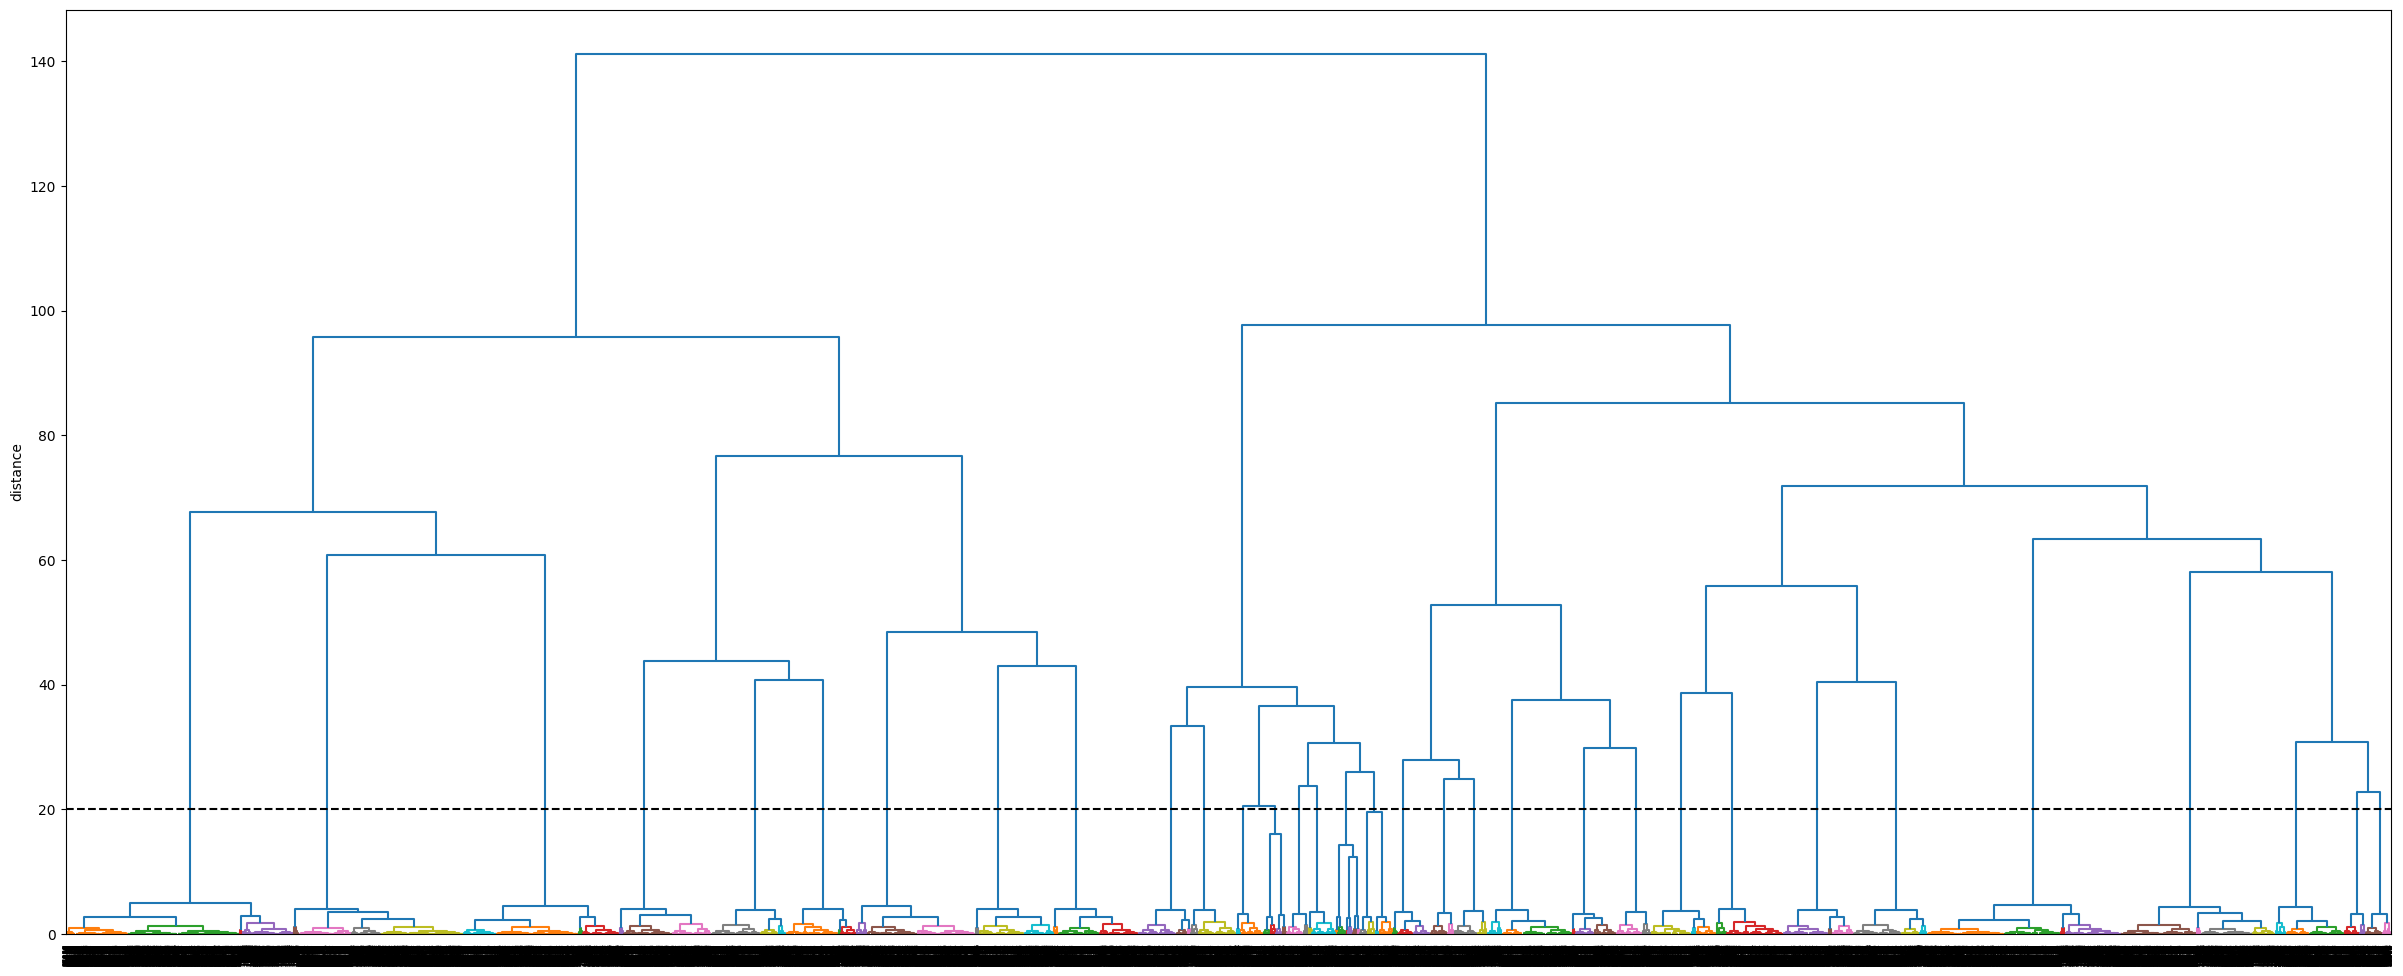

In [18]:
fig, ax = plt.subplots(figsize=(30, 12))
sch.dendrogram(Z, labels=X.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=20, color='k', linestyle='--')
ax.set_ylabel('distance')

* k = 20 seems to be a good split for the clusters.

In [19]:
## Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=20, linkage='ward')
X['Cluster'] = agglomerative.fit_predict(X)

In [20]:
X.head()

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,Cluster
2579,0.762515,0,1,0,0,0,1,0,0,0,1,3
14749,0.831993,0,1,0,0,1,0,0,1,0,0,1
36144,0.821460,0,1,0,0,0,1,0,0,1,0,4
25546,0.864317,0,0,1,0,0,1,0,0,1,0,7
19501,0.772368,0,1,0,0,0,1,0,0,1,0,4


In [21]:
X["Cluster"].value_counts()

Cluster
3     2595
8     2221
9     1938
0     1871
2     1782
4     1767
10    1758
13    1359
6     1309
1     1119
5     1065
14    1044
11     961
15     886
16     845
12     827
7      812
17     802
18     750
19     746
Name: count, dtype: int64

In [22]:
chk_list_key = X.columns
chk_list_value = []
for i in range(0,20):
    chk_list_value.append(X[X["Cluster"]==i].iloc[0,:].tolist())

In [23]:
chk_list_key

Index(['company_hash', 'salary_bin_Low', 'salary_bin_Medium',
       'salary_bin_High', 'salary_bin_Very High', 'exp_bin_Low',
       'exp_bin_Medium', 'exp_bin_High', 'ctc_updated_2020',
       'ctc_updated_2021', 'ctc_updated_other', 'Cluster'],
      dtype='object')

In [24]:
chk_list_value

[[0.6918594927133788, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 [0.831993206035629, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 [0.6177503071022259, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0],
 [0.7625151426768815, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 3.0],
 [0.8214601726233053, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 4.0],
 [0.7186404739353967, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 5.0],
 [0.7367950124648075, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 6.0],
 [0.8643172528998415, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 7.0],
 [0.957343660452742, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 8.0],
 [0.7160221518541889, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 9.0],
 [0.7702629984628206, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 10.0],
 [0.818774173426231, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 11.0],
 [0.7430822291640287, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0

In [25]:
agglo_df = pd.DataFrame(np.array(chk_list_value).T.tolist(), chk_list_key)

In [26]:
agglo_df.T

,company_hash,salary_bin_Low,salary_bin_Medium,salary_bin_High,salary_bin_Very High,exp_bin_Low,exp_bin_Medium,exp_bin_High,ctc_updated_2020,ctc_updated_2021,ctc_updated_other,Cluster
0,0.691859,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.831993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.617750,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
3,0.762515,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
4,0.821460,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0
5,0.718640,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
6,0.736795,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0
7,0.864317,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7.0
8,0.957344,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,8.0
9,0.716022,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0


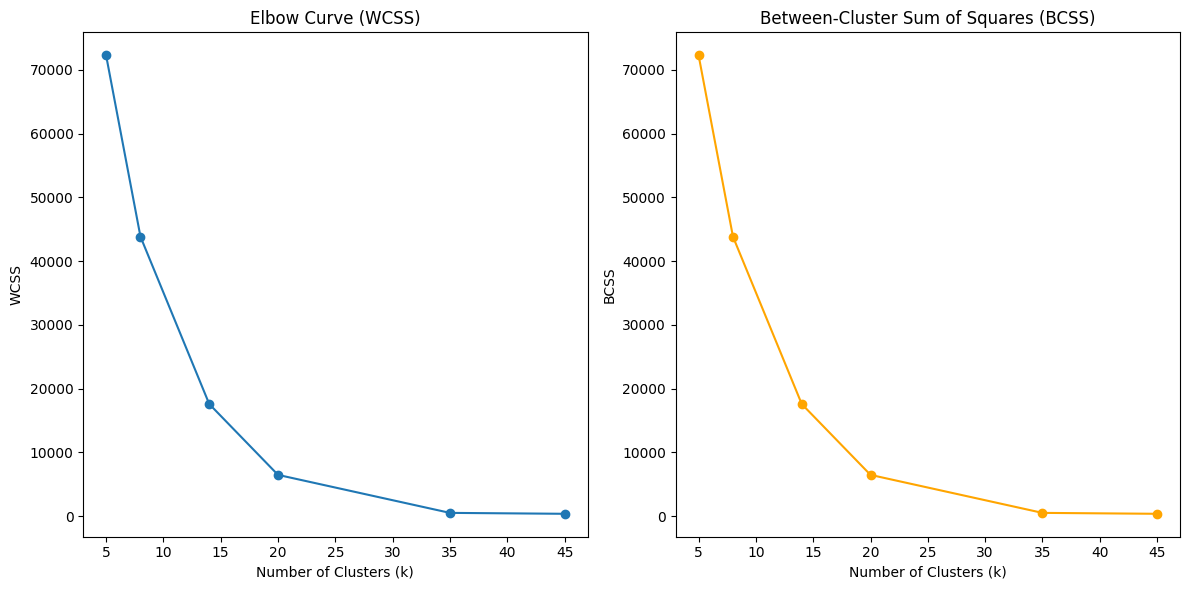

In [27]:
## K-Means Evaluation

# Define a range of k values
k_values = [5, 8, 14, 20, 35, 45]

# Initialize lists to store WCSS and BCSS values
wcss_values = []
bcss_values = []

# Calculate WCSS and BCSS for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Calculate the WCSS (inertia) for the current k
    wcss = kmeans.inertia_
    wcss_values.append(wcss)
    
    # Calculate the BCSS for the current k
    bcss = np.sum(np.square(np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)))
    bcss_values.append(bcss)

# Plot the Elbow Curve using WCSS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, wcss_values, marker='o')
plt.title('Elbow Curve (WCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')

# Plot the BCSS curve
plt.subplot(1, 2, 2)
plt.plot(k_values, bcss_values, marker='o', color='orange')
plt.title('Between-Cluster Sum of Squares (BCSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BCSS')

plt.tight_layout()
plt.show()

* k=20 seems to a good cluster for our use-case